In [1]:
#Import libraries
import pandas as pd
pd.set_option('display.max_columns', None)

#For visualization
import plotly.express as px

In [2]:
#Read the dataset
data_df = pd.read_csv("../data/churn.csv")

In [3]:
#Get overview of data
data_df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [4]:
print(f'The dataset consists of {data_df.shape[0]} rows and {data_df.shape[1]} columns')

The dataset consists of 7043 rows and 21 columns


The data fall under two categories:
- 17 Categorical features:
    - CustomerID: Customer ID unique for each customer
    - gender: Whether the customer is a male or a female
    - SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
    - Partner: Whether the customer has a partner or not (Yes, No)
    - Dependent: Whether the customer has dependents or not (Yes, No)
    - PhoneService: Whether the customer has a phone service or not (Yes, No)
    - MultipeLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
    - InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
    - OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
    - OnlineBackup: Whether the customer has an online backup or not (Yes, No, No internet service)
    - DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
    - TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
    - StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
    - StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
    - Contract: The contract term of the customer (Month-to-month, One year, Two years)
    - PaperlessBilling: The contract term of the customer (Month-to-month, One year, Two years)
    - PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
    
***
    
- 3 Numerical features:

    - Tenure: Number of months the customer has stayed with the company 
    - MonthlyCharges: The amount charged to the customer monthly
    - TotalCharges: The total amount charged to the customer
      
***

- Prediction feature:
    - Churn: Whether the customer churned or not (Yes or No)
    
    
These features can also be sub-divided into:

- Demographic customer information

    - gender , SeniorCitizen , Partner , Dependents

- Services that each customer has signed up for

    - PhoneService , MultipleLines , InternetService , OnlineSecurity , OnlineBackup , DeviceProtection , TechSupport , StreamingTV , StreamingMovies, 
    
- Customer account information

    - tenure , Contract , PaperlessBilling , PaymentMethod , MonthlyCharges , TotalCharges

### Explore Target variable

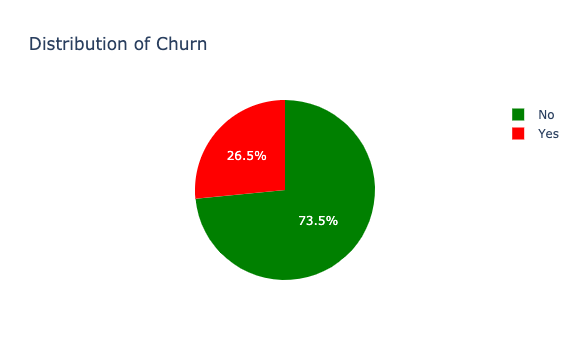

In [5]:
target_instance = data_df["Churn"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='Churn', names='Category', color_discrete_sequence=["green", "red"],
             title='Distribution of Churn')
fig.show()

We are trying to predict users that left the company in the previous month. It is a binary classification problem with an unbalance target.
- Churn: No - 73.5%
- Churn: Yes - 26.5%

### Explore Categorical features

In [6]:
def bar(feature):
    #Groupby the categorical feature
    temp_df = data_df.groupby([feature, 'Churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    #Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_df = data_df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    #Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    #Defining string formatting for graph annotation
    #Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, ' #append to empty string(formatted_str)
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str


    #Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)
    
    #Setting graph framework
    fig = px.bar(temp_df, x=feature, y='Count', color='Churn', title=f'Churn rate by {feature}', barmode="group", color_discrete_sequence=["green", "red"])
    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.4,
                y=1.3,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=400),
    )
    
    
    return fig.show()
    

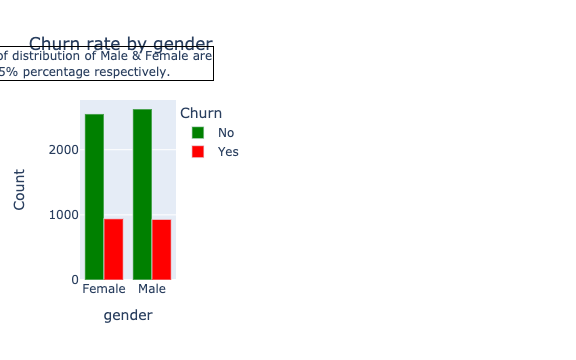

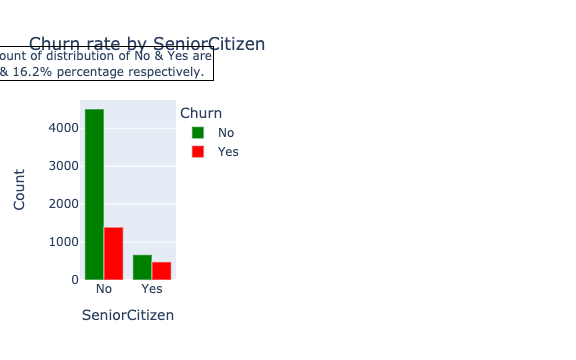

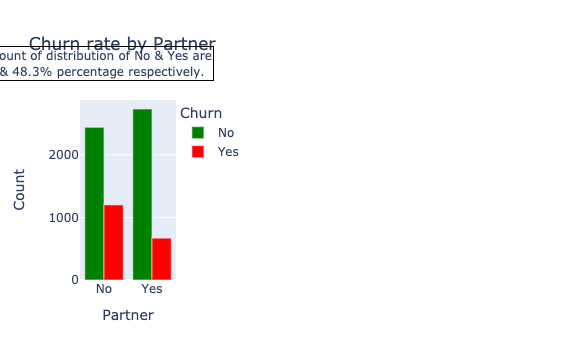

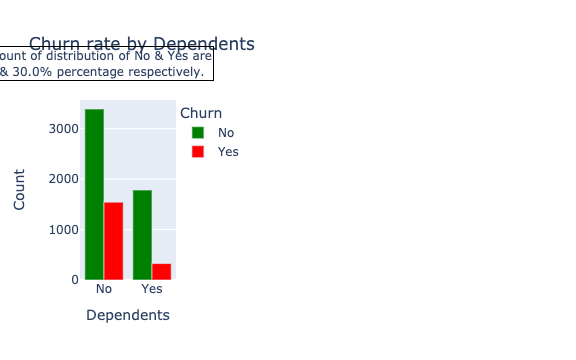

In [7]:
#Gender feature plot
bar('gender')
#SeniorCitizen feature plot 
data_df.loc[data_df.SeniorCitizen==0,'SeniorCitizen'] = "No"   #convert 0 to No in all data instances
data_df.loc[data_df.SeniorCitizen==1,'SeniorCitizen'] = "Yes"  #conver 1 to Yes in all data instaces
bar('SeniorCitizen')
#Partner feature plot
bar('Partner')
#Dependents feature plot
bar('Dependents')

**Demographic analysis Insight**: 

***


***

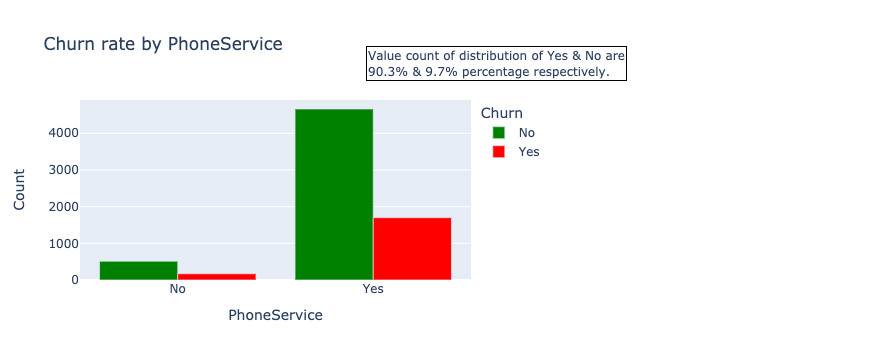

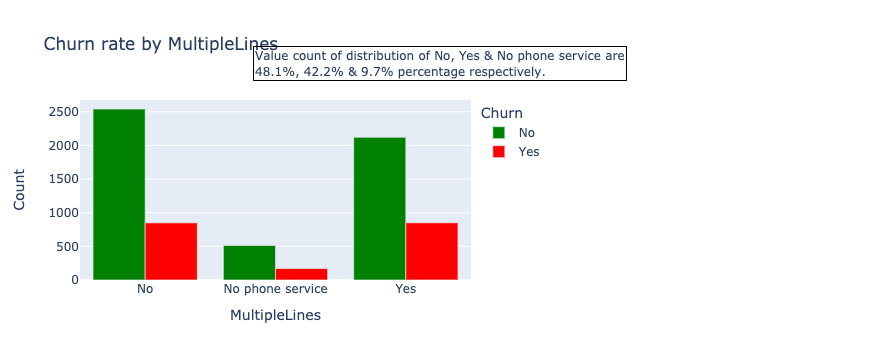

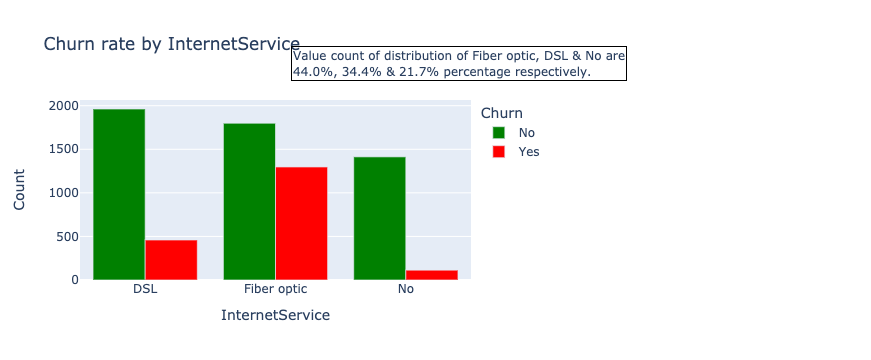

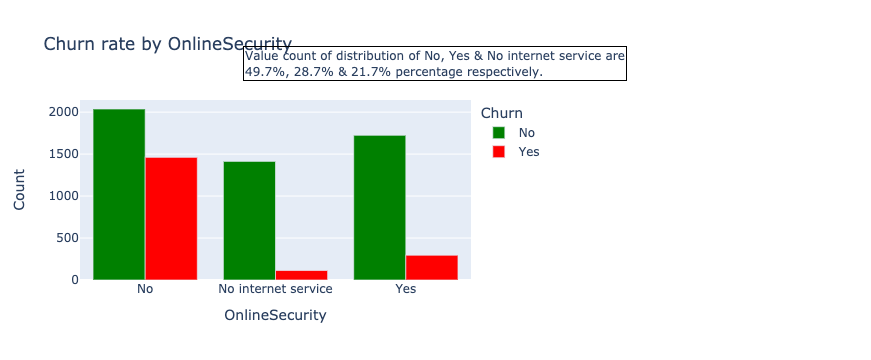

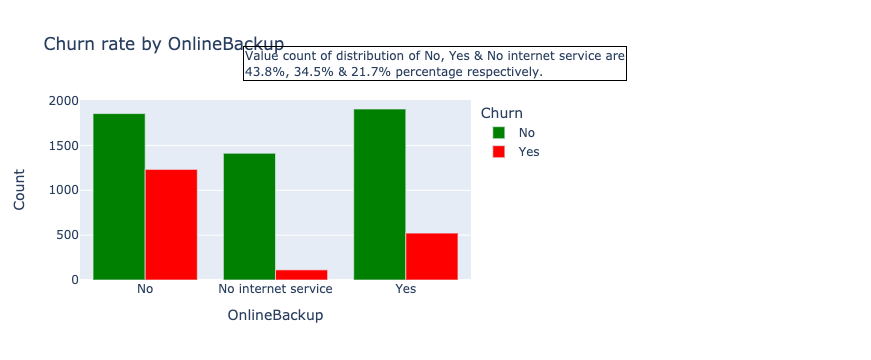

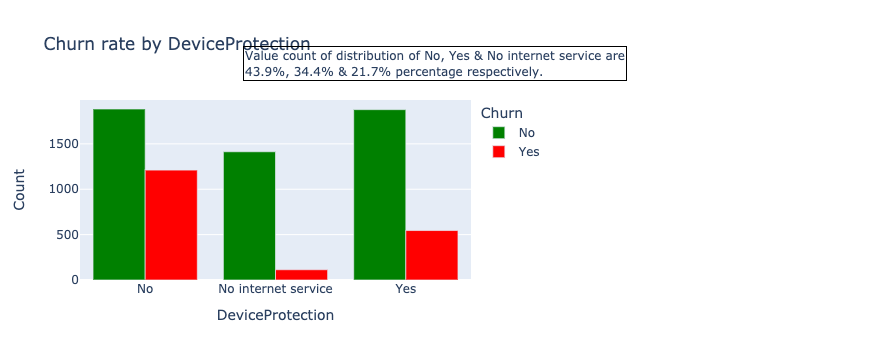

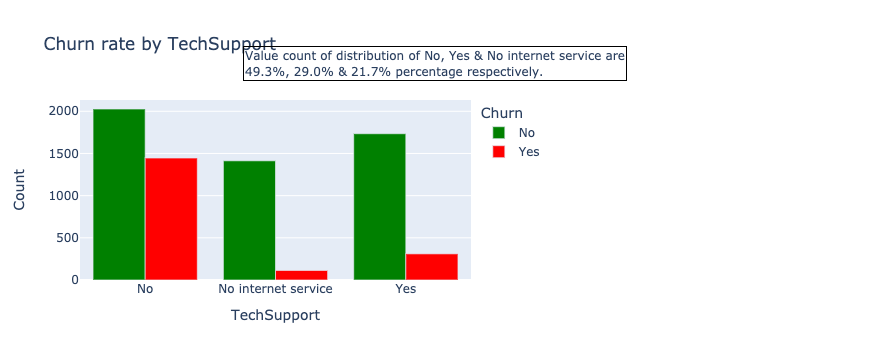

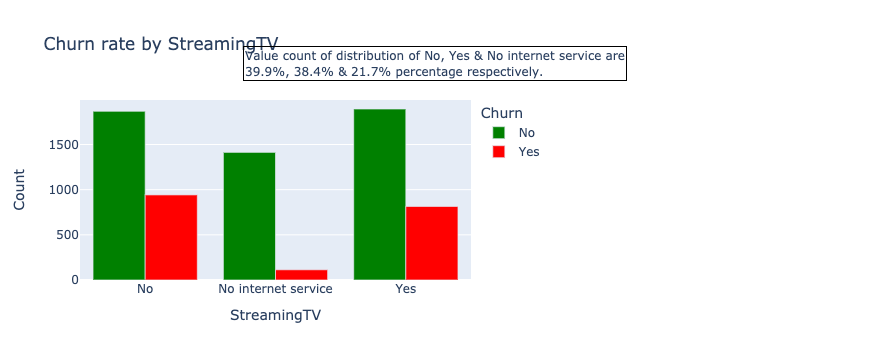

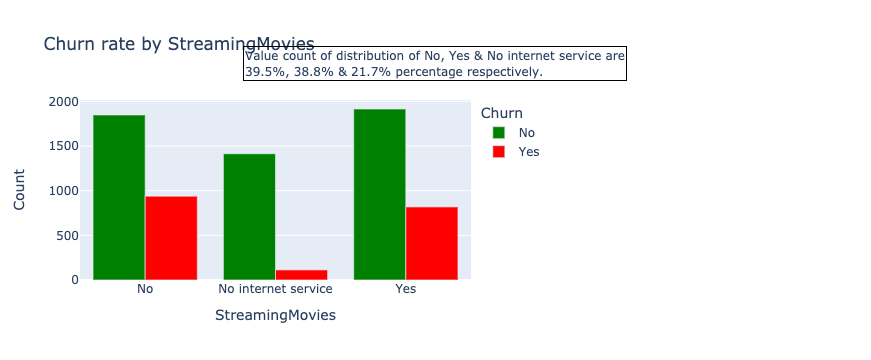

In [8]:
bar('PhoneService')
bar('MultipleLines')
bar('InternetService')
bar('OnlineSecurity')
bar('OnlineBackup')
bar('DeviceProtection')
bar('TechSupport')
bar('StreamingTV')
bar('StreamingMovies')

**Services that each customer has signed up for Insight**:

***


***

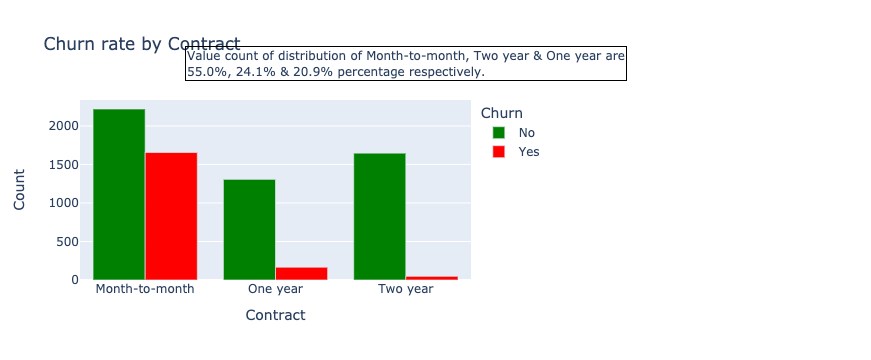

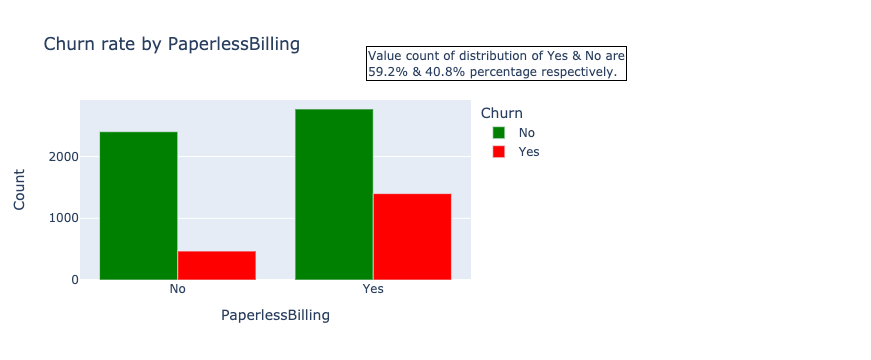

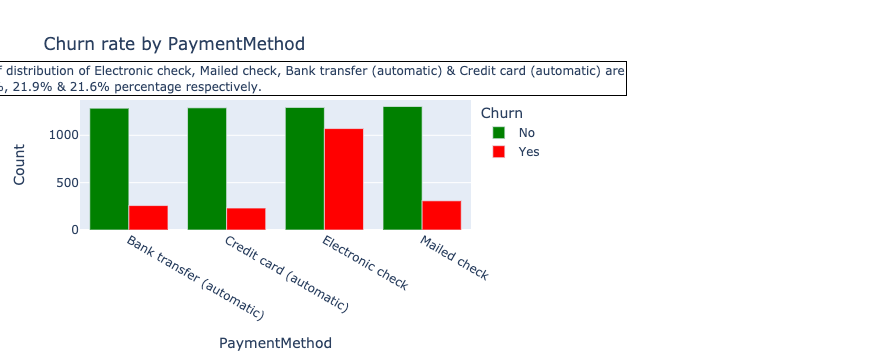

In [9]:
bar('Contract')
bar('PaperlessBilling')
bar('PaymentMethod')

**Payment**:

***


***

### Explore Numeric features

In [10]:
def hist(feature):
    group_df = data_df.groupby([feature, 'Churn']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df, x=feature, y='Count', color='Churn', marginal='box', ,color_discrete_sequence=["green", "red"])
    fig.show()

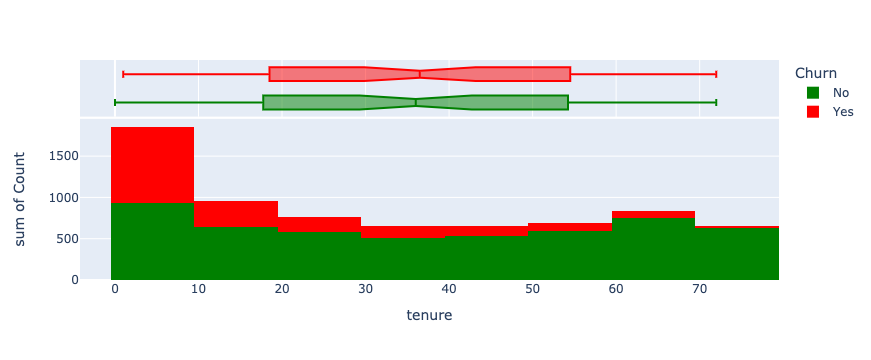

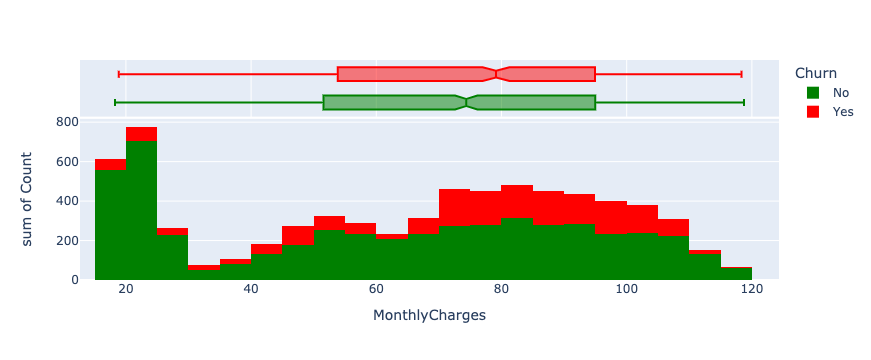

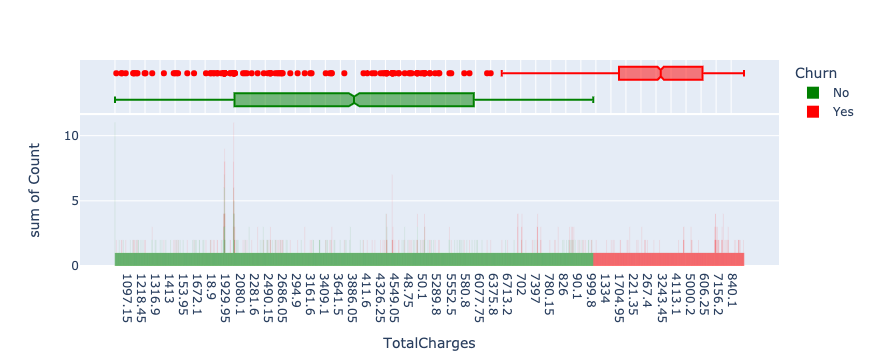

In [11]:
hist('tenure')
hist('MonthlyCharges')
hist('TotalCharges')